In [1]:
import seaborn.objects as so
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from dbgsom.dbgsom_ import DBGSOM
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits

In [3]:
digits_X, digits_y = load_digits(return_X_y=True)
som = DBGSOM(
    spreading_factor=0.5,
    n_epochs_max=300,
    random_state=42,
)

scaler = StandardScaler()

pipe = Pipeline(
    steps=[
        ("scaler", scaler),
        ("som", som),
    ]
)

pipe.fit(digits_X, digits_y)


 53%|█████▎    | 159/300 [00:03<00:03, 44.31 epochs/s]


Pipeline(steps=[('scaler', StandardScaler()),
                ('som',
                 DBGSOM(n_epochs_max=300, random_state=42,
                        spreading_factor=0.5))])

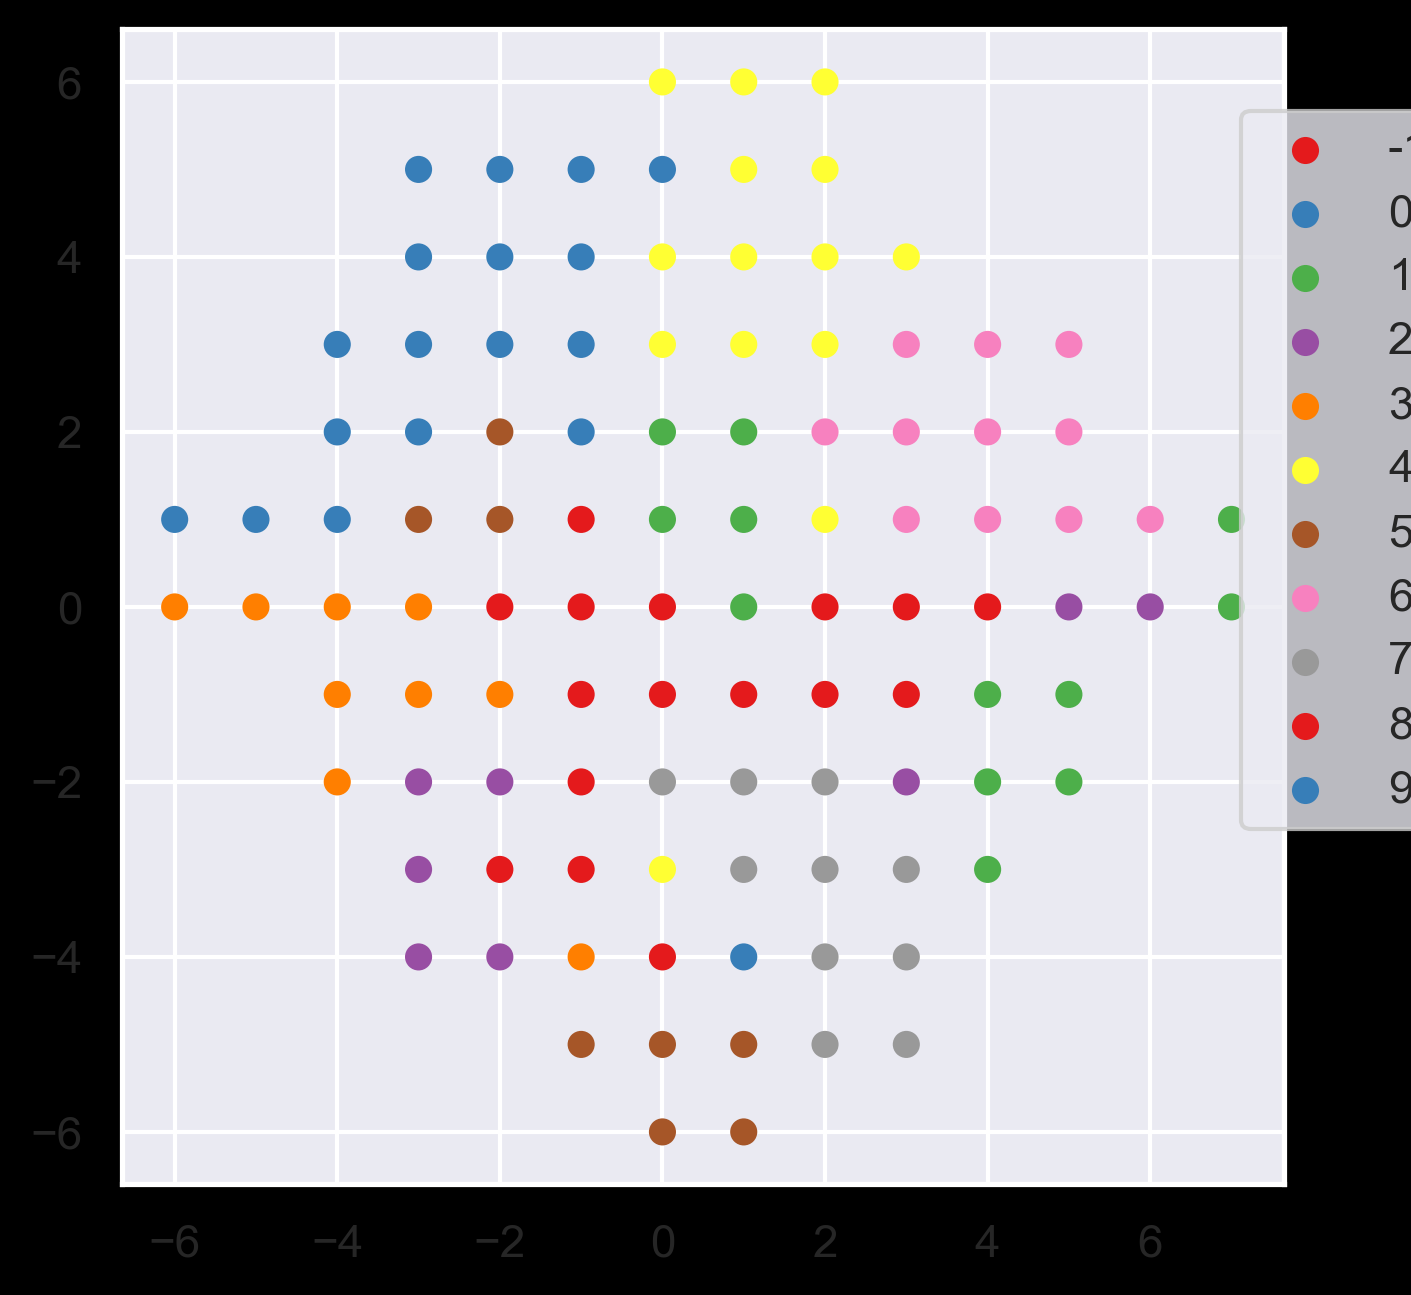

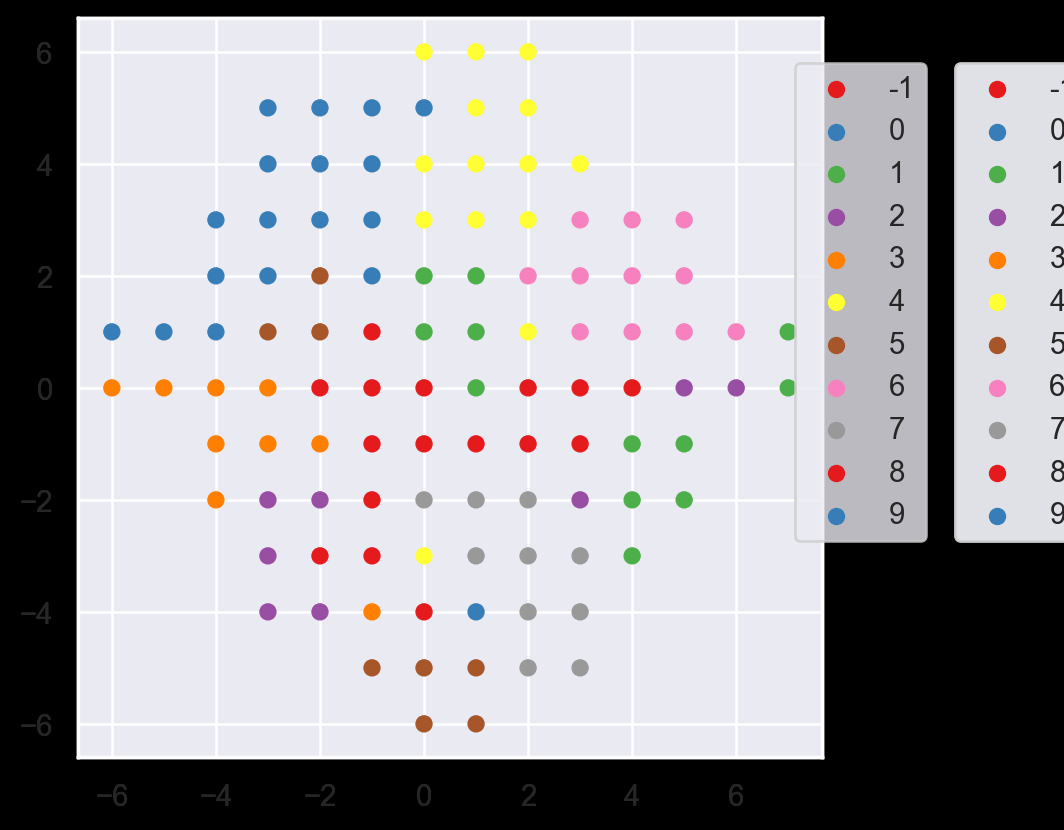

In [4]:
f = plt.figure(figsize=(5, 5), dpi=300)
labels = list(dict(som.som_.nodes.data("label")).values())
coordinates = np.array(som.neurons_)

p = so.Plot(x=coordinates[:,0], y=coordinates[:,1], color=labels).add(so.Dot()).scale(color="Set1").on(f)
p.show()
# plt.axis("off")
p.save("digits_classes.png", dpi=300)